# Polinomios ortogonales
Dos funciones $A(x)$ y $B(x)$ son _ortogonales_ en $(a,b)$ si $$\int_a^b A^\ast(x)B(x)dx=0,$$ donde $A^\ast(x)$ es el conjugado complejo de $A(x)$.

Si se tiene un conjunto de funciones $A_n(x)$, $n=1,2,3,...$ y $$\int_a^b A^\ast_n(x)A_m(x)dx=\left\{\begin{aligned}&0, &\text{si} \ m\neq n,\\ &k\neq 0, &\text{si} \ m=n, \end{aligned}\right.$$ donde $k$ es constante, las funciones $A_n$ forman un _conjunto de funciones ortogonales_.

## Polinomios de Legendre

La ecuación diferencial de Legendre viene dada por:
$$(1-x^2)y''-2xy'+l(l+1)y=0, \quad l\in \mathbb{R}$$
La cual aparece al resolver problemas de mecánica, física cuántica, teoría electromágnetica, etc. Los _polinomios de Legendre_, $P_l(x)$, son las soluciones de la EDO anterior para cada valor de $l$. Hay muchas formas de determinar dichos polinomios, entre esas está la _la fórmula de Rodrigues_ que usando la regla de Leibniz se obtine:

$$P_l(x)=\frac{1}{2^l l!}\frac{d^l}{dx^l}(x^2-1)^l$$

Algunos polinomios de Legendre son:

$$P_0(x)=1 \qquad P_1(x)=x \qquad P_2(x)=\frac{1}{2}(3x^2-1)$$

Los polinomios de Legendre forman un conjunto de funciones ortogonales en $(-1,1)$ ya que:
$$\int_{-1}^1P_l(x)P_m(x)dx=0, \qquad m\neq l$$

### Ejercicios
**Encuentre $P_0(x), P_1(x), P_2(x), P_3(x), P_4(x)$ de la fórmula de Rodrigues. Compruebe su resultado con un computador:**

In [1]:
import math as m
from sympy import *
from sympy import simplify

def f_rod(l):  
    x = symbols('x')
    y = symbols('y')
    y = (x**2 - 1)**l
    pol = diff(y,x,l)/(2**l * m.factorial(l)) 
    return simplify(pol)

for i in range(5):
    print("P_",i,"(x)=",f_rod(i))

P_ 0 (x)= 1
P_ 1 (x)= x
P_ 2 (x)= 3*x**2/2 - 1/2
P_ 3 (x)= x*(5*x**2 - 3)/2
P_ 4 (x)= 35*x**4/8 - 15*x**2/4 + 3/8


**Evalúe $\displaystyle \int_{-1}^1 P_0(x)P_2(x)dx$ para mostrar que estas funciones son ortogonales en $(-1,1)$**

In [2]:
x = symbols('x')
integrate(f_rod(0)*f_rod(2),(x,-1,1))

0

## Polinomios de Bessel

La ecuación diferencial de Bessel viene dada por:
$$x^2y''+xy'+(x^2-p^2)y=0, \quad p\in \mathbb{R}$$
La cual aparece al resolver problemas de hidrodinámica, calor, elasticidad, etc. Los _polinomios de Bessel_, son las soluciones de la EDO anterior para cada valor de $p$. Dado que la ecuación de Bessel es de segundo orden se tiene que sus soluciones vendrán dadas por:

$$y=AJ_p(x)+BN_p(x)$$

$J_p(x)$ son denominadas _funciones de Bessel de la primera especie_ y vienen dadas por:
$$J_p(x)=\sum_{n=0}^\infty \frac{(-1)^n}{\Gamma (n+1)\Gamma (n+1+p)}\left(\frac{x}{2}\right)^{2n+p}$$

$N_p(x)$ son denominadas _funciones de Bessel de la segunda especie_ o también _funciones de Neumann_, $N_p$, o _funciones de Weber_, $Y_p$ y vienen dadas por:
$$N_p(x)=Y_p=\frac{\cos(\pi p)J_p(x)-J_{-p}(x)}{\sin(\pi p)}$$

Además de las funciones anteriores hay otras funciones que también son llamadas funciones de Bessel al ser variaciones con algunas modificaciones de las anteriores:
* Funciones de Hankel o funciones de Bessel de la tercera especie.
* Funciones de Bessel hiperbolicas.
* Funciones de Bessel esféricas.
* Funciones de Kelvin.

Si $\alpha_n$, $n=1,2,3,...$ son los ceros de $J_p(x)$ entonces las funciones $J_p(\alpha_n x)$ son ortogonales en $(0,1)$ con respecto a la función de peso $x$, ya que:

$$\int_0^1 xJ_p(\alpha x) J_p(\beta x) dx=\left\{\begin{aligned}&0, &\alpha \neq \beta\\ &\frac{1}{2}J^2_{p+1}(\alpha), &\alpha=\beta\end{aligned}\right.\qquad \alpha, \beta \ \text{son ceros de} \ J_p(x).$$

### Ejercicios
**Por computador, grafique $J_p(x)$ para $p=0,1,2,3$ y $x=0,...,15$.**

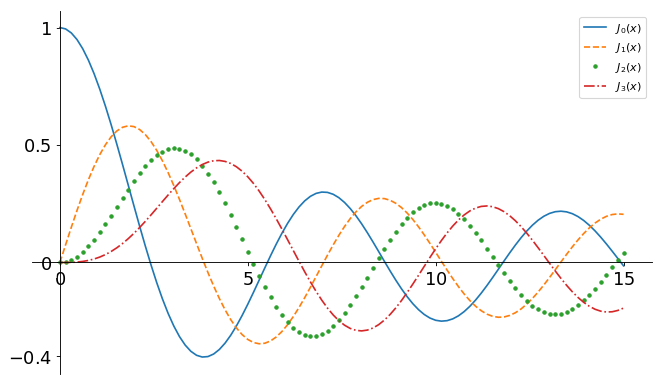

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

x=np.linspace(0,15,100)
B=np.zeros((4,len(x)))
for j in range(4):
    for i in range(len(x)):
        B[j][i]=jv(j,x[i])
plt.figure(figsize=(10,6), dpi=80)
plt.xticks([0,5,10,15],
       [r'$0$', r'$5$', r'$10$',r'$15$'])

plt.yticks([-0.4,0,0.5,1],
       [r'$-0.4$',r'$0$',r'$0.5$',r'$1$'])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(x, B[0],"-",x, B[1],"--",x, B[2],".",x, B[3],"-.")
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))
plt.legend((r'$J_0(x)$',r'$J_1(x)$',r'$J_2(x)$',r'$J_3(x)$'),loc=0)
plt.show()

**Por computador, grafique $N_0(x)$ para $x=0,...,15$ y $N_p(x)$ para $p=1,2,3$ y $x=0,...,15$.**

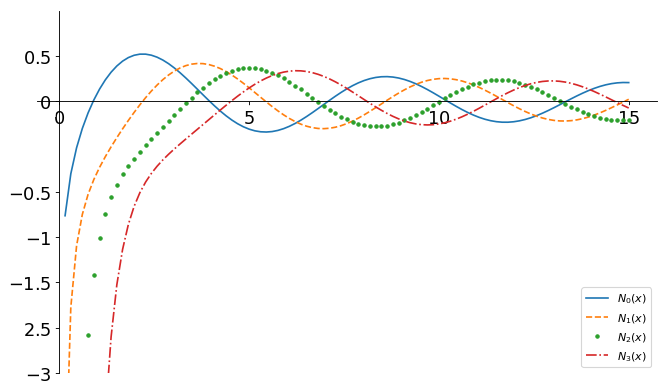

In [4]:
from scipy.special import yn

x=np.linspace(0,15,100)
B=np.zeros((4,len(x)))
for j in range(4):
    for i in range(len(x)):
        B[j][i]=yn(j,x[i])
plt.figure(figsize=(10,6), dpi=80)
plt.xticks([0,5,10,15],[r'$0$', r'$5$', r'$10$',r'$15$'])

plt.yticks([-3,-2.5,-2,-1.5,-1,0,0.5],[r'$-3$',r'$2.5$',r'$-1.5$',r'$-1$',r'$-0.5$',r'$0$',r'$0.5$'])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set(ylim=(-3,1))
plt.plot(x, B[0],"-",x, B[1],"--",x, B[2],".",x, B[3],"-.")
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))
plt.legend((r'$N_0(x)$',r'$N_1(x)$',r'$N_2(x)$',r'$N_3(x)$'),loc=0)
plt.show()

## Polinomios de Hermite

La ecuación diferencial de Hermite viene dada por:
$$y''-2xy'+2ny=0, \quad n\in \mathbb{R}$$
La cual aparece al resolver problemas de mecánica cuántica. Los _polinomios de Hermite_, son las soluciones de la EDO anterior para cada valor de $n$. Una fórmula de Rodrigues para estos polinomios viene dada por:
$$H_n(x)=(-1)^ne^{x^2}\frac{d^n}{dx^n}e^{-x^2}$$

Los primeros polinomios de Hermite son:
$$H_0(x)=1 \qquad H_1(x)=2x \qquad H_2(x)=4x^2-2$$

Los polinomios de Hermite son ortogonales en $(-\infty,\infty)$ con respecto a la función de peso $e^{-x^2}$, ya que:

$$\int_{-\infty}^\infty e^{-x^2}H_n(x)H_m(x)dx=\left\{\begin{aligned}&0, &m \neq n\\ &\sqrt{\pi}2^n n!, &m=n\end{aligned}\right. .$$

### Ejercicios
**Usando la fórmula de Rodrigues, encuentre los tres primeros polinomios de Hermite. Luego, use el hecho que $H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)$ para encontrar los dos siguientes.**

In [5]:
def f_her(n):  
    x = symbols('x')
    y = symbols('y')
    y = exp(-x**2)
    pol = (-1)**n *exp(x**2)*diff(y,x,n)
    return pol

for i in range(3):
    print("H_",i,"(x)=",f_her(i))

H_ 0 (x)= 1
H_ 1 (x)= 2*x
H_ 2 (x)= 4*x**2 - 2


In [6]:
x = symbols('x')
for i in range(2,4):
    print("H_",i+1,"(x)=",simplify(2*x*f_her(i)-2*i*f_her(i-1)))

H_ 3 (x)= 8*x**3 - 12*x
H_ 4 (x)= 16*x**4 - 48*x**2 + 12


## Polinomios de Laguerre 

La ecuación diferencial de Laguerre viene dada por:
$$xy''+(1-x)y'+ny=0, \quad n\in \mathbb{R}$$
La cual aparece al resolver problemas de mecánica cuántica. Los _polinomios de Laguerre_, son las soluciones de la EDO anterior para cada valor de $n$. Una fórmula de Rodrigues para estos polinomios viene dada por:
$$L_n(x)=\frac{1}{n!}e^x\frac{d^n}{dx^n}x^ne^{-x}$$

Los primeros polinomios de Laguerre son:
$$L_0(x)=1 \qquad L_1(x)=1-x \qquad L_2(x)=1-2x+\frac{x^2}{2}$$

Los polinomios de Laguerre son ortogonales en $(0,\infty)$ con respecto a la función de peso $e^{-x}$, ya que:

$$\int_0^\infty e^{-x}L_n(x)L_k(x)dx=\left\{\begin{aligned}&0, &k \neq n\\ &1, &m=n\end{aligned}\right. .$$

### Ejercicios
**Usando el hecho que $\displaystyle L_n(x)=\sum_{m=0}^n(-1)^m\binom{n}{m}\frac{x^m}{m!}$ encuentre los cuatro primeros polinomios de Laguerre.**

In [7]:
from scipy.special import binom

def f_lag(n):  
    x = symbols('x')
    y = symbols('y')
    y=0
    for j in range(n+1):
        y = y+(-1)**j*binom(n,j)*(x**j/m.factorial(j))
    return y

for i in range(5):
    print("L_",i,"(x)=",f_lag(i))

L_ 0 (x)= 1.00000000000000
L_ 1 (x)= -1.0*x + 1.0
L_ 2 (x)= 0.5*x**2 - 2.0*x + 1.0
L_ 3 (x)= -0.166666666666667*x**3 + 1.5*x**2 - 3.0*x + 1.0
L_ 4 (x)= 0.0416666666666667*x**4 - 0.666666666666667*x**3 + 3.0*x**2 - 4.0*x + 1.0


**Teniendo en cuenta que $\displaystyle L_n^k(x)=(-1)^k\frac{d^k}{dx^k}L_{n+k}(x)$, encuentre $L_n^k$ para $n=0,1,2$, y $k=1,2$.**

In [8]:
for i in range(3):
    for j in range(1,3):
        print("L_",i,"^",j,"(x)=",(-1)**j*diff(f_lag(i+j),x,j))

L_ 0 ^ 1 (x)= 1.00000000000000
L_ 0 ^ 2 (x)= 1.00000000000000
L_ 1 ^ 1 (x)= -1.0*x + 2.0
L_ 1 ^ 2 (x)= -1.0*x + 3.0
L_ 2 ^ 1 (x)= 0.5*x**2 - 3.0*x + 3.0
L_ 2 ^ 2 (x)= 0.5*x**2 - 4.0*x + 6.0
